# Обработка дата сета:

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./data_set/bank-full.csv', sep=';', encoding ='cp1251')
data.T

,0,1,2,3,4,5,6,7,8,9,...,45201,45202,45203,45204,45205,45206,45207,45208,45209,45210
age,58,44,33,47,33,35,28,42,58,43,...,53,34,23,73,25,51,71,72,57,37
job,management,technician,entrepreneur,blue-collar,unknown,management,management,entrepreneur,retired,technician,...,management,admin.,student,retired,technician,technician,retired,retired,blue-collar,entrepreneur
marital,married,single,married,married,single,married,single,divorced,married,single,...,married,single,single,married,single,married,divorced,married,married,married
education,tertiary,secondary,secondary,unknown,unknown,tertiary,tertiary,tertiary,primary,secondary,...,tertiary,secondary,tertiary,secondary,secondary,tertiary,primary,secondary,secondary,secondary
default,no,no,no,no,no,no,no,yes,no,no,...,no,no,no,no,no,no,no,no,no,no
balance,2143,29,2,1506,1,231,447,2,121,593,...,583,557,113,2850,505,825,1729,5715,668,2971
housing,yes,yes,yes,yes,no,yes,yes,yes,yes,yes,...,no,no,no,no,no,no,no,no,no,no
loan,no,no,yes,no,no,no,yes,no,no,no,...,no,no,no,no,yes,no,no,no,no,no
contact,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,...,cellular,cellular,cellular,cellular,cellular,cellular,cellular,cellular,telephone,cellular
day,5,5,5,5,5,5,5,5,5,5,...,17,17,17,17,17,17,17,17,17,17


Для оставшейся части домашнего задания вам нужно будет использовать только следующие столбцы:

* `age`,
* `job`,
* `marital`,
* `education`,
* `balance`,
* `housing`,
* `contact`,
* `day`,
* `month`,
* `duration`,
* `campaign`,
* `pdays`,
* `previous`,
* `poutcome`,
* `y`

In [3]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
data = data.drop('default',axis=1)
data = data.drop('loan',axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB



Какое самое частое значение (mode) для столбца `education`?

In [6]:
data['education'].mode()

0    secondary
Name: education, dtype: object

Подотовим дата сет к кореляции:

In [7]:
def lets_index (data: pd.DataFrame, columns):
    for col in columns:
        unique_list = sorted(data[col].unique())
        index_dict = dict(zip(unique_list, range(len(unique_list))))

        data[col] = data[col].map(lambda item: float(index_dict[item]))
    return data

In [8]:
col = ['job', 'marital', 'education', 'poutcome', 'contact', 'month']
data = lets_index(data, col)

In [9]:
def to_bool(data, columns):
    for index in columns:
        data[index] = data[index].map(lambda item: item == 'yes')
    return data

In [10]:
col = ['housing', 'y']
data = to_bool(data, col)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  float64
 2   marital    45211 non-null  float64
 3   education  45211 non-null  float64
 4   balance    45211 non-null  int64  
 5   housing    45211 non-null  bool   
 6   contact    45211 non-null  float64
 7   day        45211 non-null  int64  
 8   month      45211 non-null  float64
 9   duration   45211 non-null  int64  
 10  campaign   45211 non-null  int64  
 11  pdays      45211 non-null  int64  
 12  previous   45211 non-null  int64  
 13  poutcome   45211 non-null  float64
 14  y          45211 non-null  bool   
dtypes: bool(2), float64(6), int64(7)
memory usage: 4.6 MB


Создайте [корреляционную матрицу](https://www.google.com/search?q=correlation+matrix) для числовых признаков вашего датасета.  
В корреляционной матрице вычислите коэффициент корреляции между каждой парой признаков.


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

- `age` и `balance`
- `day` и `campaign`
- `day` и `pdays`
- `pdays` и `previous`

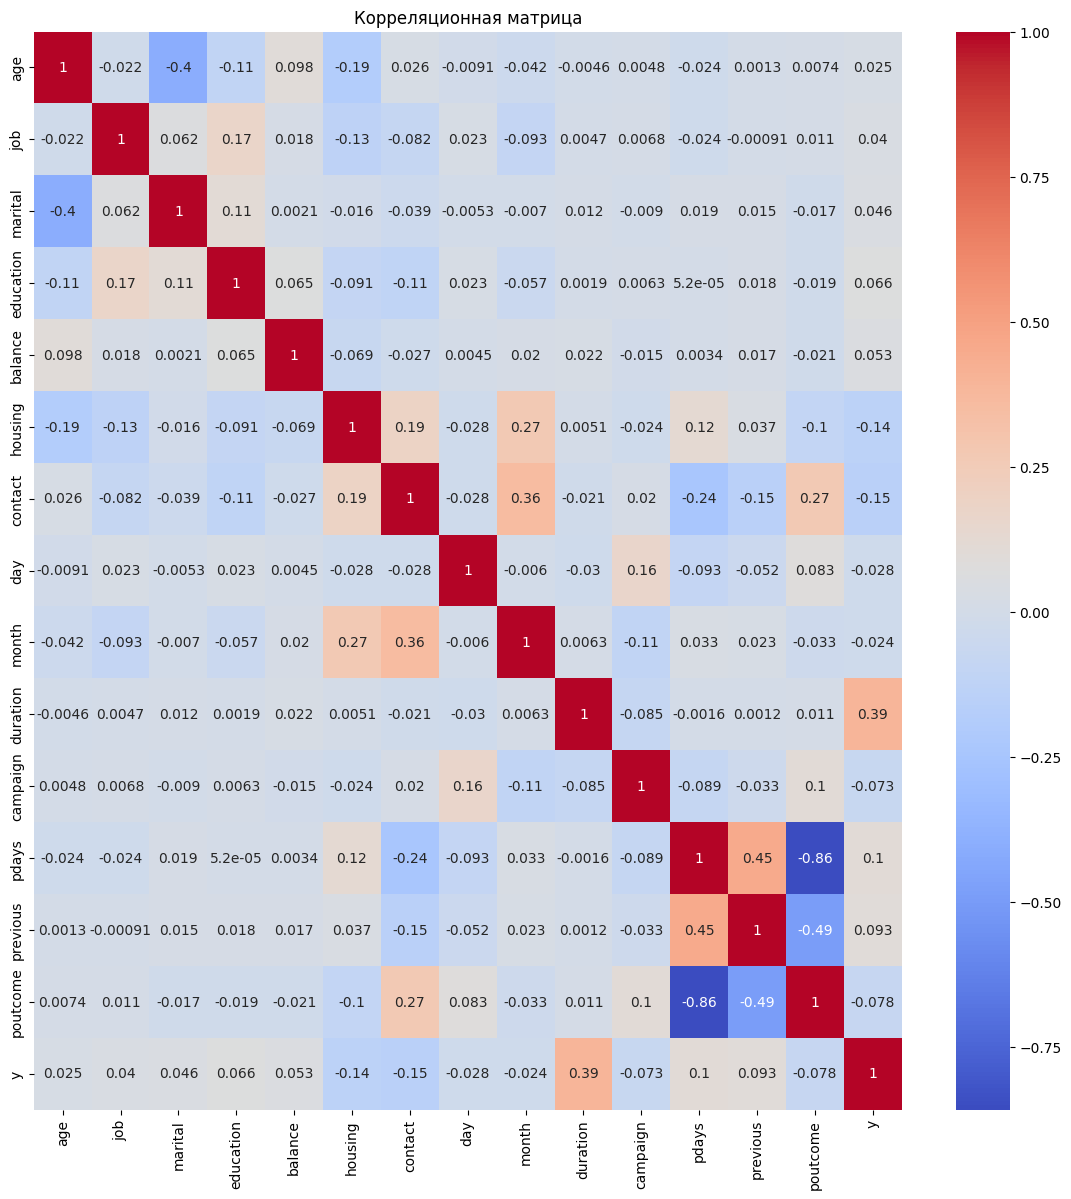

In [13]:
plt.figure(figsize=(14, 14))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Какие два признака имеют наибольшую корреляцию?

- `age` и `balance` - 0.098
- `day` и `campaign` - 0.16
- `day` и `pdays` - -0.093
- `pdays` и `previous` - 0.45

Ответ: `pdays` и `previous`

Разделим на обучаемую и тестовую выборку

In [14]:
data = data.to_numpy()
data[:, -1] = data[:, -1].astype(int)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_x , test_x, train_y, test_y = train_test_split(data[:, :-1], data[: ,-1], test_size=0.4, random_state=42)

Обучим модель

In [17]:
from catboost import CatBoostClassifier, Pool

In [18]:
(len(train_y)-sum(train_y))/sum(train_y)

7.5087829360100375

In [25]:
model = CatBoostClassifier( 
    loss_function='Logloss',
    class_weights={0:1, 1:7.5087829360100375},
    eval_metric="AUC",
    devices='GPU',
    iterations=1000, 
    random_state=42
    )

In [26]:
train = Pool(train_x, train_y)
test = Pool(test_x, test_y)

In [27]:
model.fit(train)

Learning rate set to 0.042169
0:	total: 10.2ms	remaining: 10.1s
1:	total: 19.1ms	remaining: 9.55s
2:	total: 29ms	remaining: 9.64s
3:	total: 37.4ms	remaining: 9.31s
4:	total: 45.6ms	remaining: 9.07s
5:	total: 54.7ms	remaining: 9.06s
6:	total: 64.2ms	remaining: 9.1s
7:	total: 73ms	remaining: 9.05s
8:	total: 82.5ms	remaining: 9.09s
9:	total: 92.2ms	remaining: 9.13s
10:	total: 101ms	remaining: 9.05s
11:	total: 108ms	remaining: 8.9s
12:	total: 115ms	remaining: 8.77s
13:	total: 123ms	remaining: 8.65s
14:	total: 130ms	remaining: 8.56s
15:	total: 138ms	remaining: 8.51s
16:	total: 146ms	remaining: 8.47s
17:	total: 154ms	remaining: 8.38s
18:	total: 161ms	remaining: 8.31s
19:	total: 168ms	remaining: 8.25s
20:	total: 176ms	remaining: 8.21s
21:	total: 185ms	remaining: 8.21s
22:	total: 193ms	remaining: 8.21s
23:	total: 202ms	remaining: 8.23s
24:	total: 211ms	remaining: 8.24s
25:	total: 220ms	remaining: 8.23s
26:	total: 230ms	remaining: 8.3s
27:	total: 240ms	remaining: 8.31s
28:	total: 248ms	remainin

In [30]:
model.score(test)

0.872103953552668

Точность хорошая, т.к. была проведенна балансировка классов. 

# 👍